# Image compression and denoising using Wavelets
## Student: Caviglia Sara 5163676

## Image compression
Given an image, we can use 2D wavelets to compress it.

In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import color

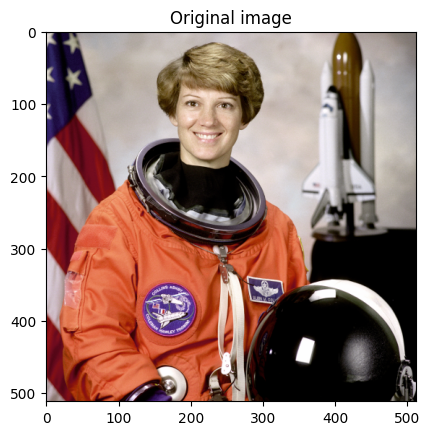

In [2]:
img = skimage.data.astronaut()
plt.imshow(img, cmap='gray')
plt.title("Original image")
plt.show()

We take the astronaut image from <tt>skimage</tt>, but we work on the gray scale version: in this way we have only one channel, instead of the 3 channels for RGB.

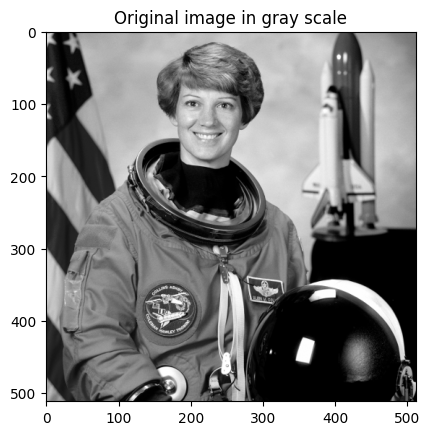

In [3]:
img = color.rgb2gray(img)
plt.imshow(img, cmap="gray")
plt.title("Original image in gray scale")
plt.show()

### Compression with <tt>haar</tt>, <tt>sym2</tt>, <tt>db1</tt>
We know that there are different families of wavelets: we start by using the Haar wavelets.

Non-zero coefficients before thresholding:  236234


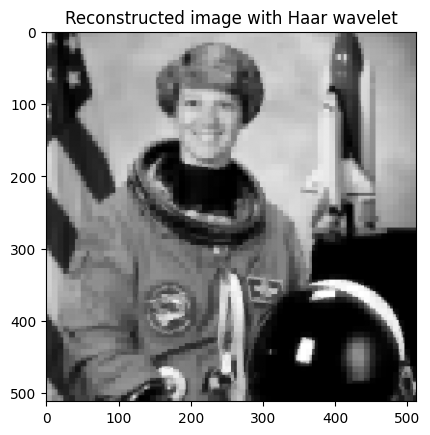

In [4]:
# We decompose the image with the wavedec2 function. We work on 4 levels.
coeffs_haar = pywt.wavedec2(img, 'haar', level=4)
# We convert the coefficients to an array and count the non-zero coefficients.
arr_coeffs_haar, _ = pywt.coeffs_to_array(coeffs_haar)
non_zero_coeffs_haar = np.count_nonzero(arr_coeffs_haar)
print("Non-zero coefficients before thresholding: ", non_zero_coeffs_haar)

# We have different values for the thresholds, based on the grain we want to see.
# THESE WILL BE THE SAME FOR EVERY TYPE OF WAVELET CONSIDERED.
t_fine = 1
t_mid = 0.5
t_coarse = 0.3

# We start by thresholding on the fourth level with the finest value.
(cH_haar, cV_haar, cD_haar) = coeffs_haar[4]
cH_haar_thresh_fine = pywt.threshold(cH_haar, t_fine, mode='soft')
cV_haar_thresh_fine = pywt.threshold(cV_haar, t_fine, mode='soft')
cD_haar_thresh_fine = pywt.threshold(cD_haar, t_fine, mode='soft')
coeffs_haar[4] = (cH_haar_thresh_fine, cV_haar_thresh_fine, cD_haar_thresh_fine)

# We proceed with the middle value.
(cH_haar, cV_haar, cD_haar) = coeffs_haar[3]
cH_haar_thresh_mid = pywt.threshold(cH_haar, t_mid, mode='soft')
cV_haar_thresh_mid = pywt.threshold(cV_haar, t_mid, mode='soft')
cD_haar_thresh_mid = pywt.threshold(cD_haar, t_mid, mode='soft')
coeffs_haar[3] = (cH_haar_thresh_mid, cV_haar_thresh_mid, cD_haar_thresh_mid)

# We end with the smallest value, for coarse details.
(cH_haar, cV_haar, cD_haar) = coeffs_haar[2]
cH_haar_thresh_fine = pywt.threshold(cH_haar, t_coarse, mode='soft')
cV_haar_thresh_mid = pywt.threshold(cV_haar, t_coarse, mode='soft')
cD_haar_thresh_coarse = pywt.threshold(cD_haar, t_coarse, mode='soft')
coeffs_haar[2] = (cH_haar_thresh_fine, cV_haar_thresh_mid, cD_haar_thresh_coarse)

# We reconstruct the image from the thresholded coefficients.
img_reconstructed_haar = pywt.waverec2(coeffs_haar, 'haar')
plt.imshow(img_reconstructed_haar, cmap='gray')
plt.title("Reconstructed image with Haar wavelet")
plt.show()

In [5]:
# We convert the post-thresholding coefficients to an array and count the non-zero coefficients.
arr_coeffs_haar, _ = pywt.coeffs_to_array(coeffs_haar)
non_zero_coeffs_haar_after = np.count_nonzero(arr_coeffs_haar)
print("Non-zero coefficients after thresholding: ", non_zero_coeffs_haar_after)
# We compute the compression ratio = non-zero coefficients before / non-zero coefficients after
compression_ratio_haar = non_zero_coeffs_haar / non_zero_coeffs_haar_after
print("Compression ratio (Haar): ", compression_ratio_haar)

Non-zero coefficients after thresholding:  6635
Compression ratio (Haar):  35.60422004521477


After we've seen the compression with Haar wavelets, we could appreciate the difference computing the non-zero coefficients before and after the threshold and the compression ratio.
Now we can see how other wavelets behave: we study <tt>sym2</tt> (Symlet) and <tt>db1</tt> (Daubechies).

Non-zero coefficients before thresholding:  245022


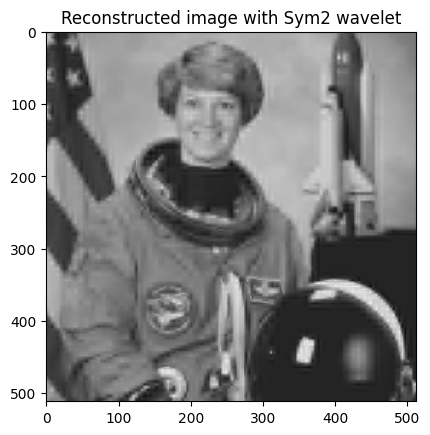

In [6]:
coeffs_sym2 = pywt.wavedec2(img, 'sym2', level=4)
arr_coeffs_sym2, _ = pywt.coeffs_to_array(coeffs_sym2)
non_zero_coeffs_sym2 = np.count_nonzero(arr_coeffs_sym2)
print("Non-zero coefficients before thresholding: ", non_zero_coeffs_sym2)

(cH_sym2, cV_sym2, cD_sym2) = coeffs_sym2[4]
cH_sym2_thresh_fine = pywt.threshold(cH_sym2, t_fine, mode='soft')
cV_sym2_thresh_fine = pywt.threshold(cV_sym2, t_fine, mode='soft')
cD_sym2_thresh_fine = pywt.threshold(cD_sym2, t_fine, mode='soft')
coeffs_sym2[4] = (cH_sym2_thresh_fine, cV_sym2_thresh_fine, cD_sym2_thresh_fine)

(cH_sym2, cV_sym2, cD_sym2) = coeffs_sym2[3]
cH_sym2_thresh_mid = pywt.threshold(cH_sym2, t_mid, mode='soft')
cV_sym2_thresh_mid = pywt.threshold(cV_sym2, t_mid, mode='soft')
cD_sym2_thresh_mid = pywt.threshold(cD_sym2, t_mid, mode='soft')
coeffs_sym2[3] = (cH_sym2_thresh_mid, cV_sym2_thresh_mid, cD_sym2_thresh_mid)

(cH_sym2, cV_sym2, cD_sym2) = coeffs_sym2[2]
cH_sym2_thresh_coarse = pywt.threshold(cH_sym2, t_coarse, mode='soft')
cV_sym2_thresh_coarse = pywt.threshold(cV_sym2, t_coarse, mode='soft')
cD_sym2_thresh_coarse = pywt.threshold(cD_sym2, t_coarse, mode='soft')
coeffs_sym2[2] = (cH_sym2_thresh_coarse, cV_sym2_thresh_coarse, cD_sym2_thresh_coarse)

img_reconstructed_sym2 = pywt.waverec2(coeffs_sym2, 'sym2')
plt.imshow(img_reconstructed_sym2, cmap='gray')
plt.title("Reconstructed image with Sym2 wavelet")
plt.show()

In [7]:
arr_coeffs_sym2, _ = pywt.coeffs_to_array(coeffs_sym2)
non_zero_coeffs_sym2_after = np.count_nonzero(arr_coeffs_sym2)
print("Non-zero coefficients after thresholding: ", non_zero_coeffs_sym2_after)
compression_ratio_sym2 = non_zero_coeffs_sym2 / non_zero_coeffs_sym2_after
print("Compression ratio (Sym2): ", compression_ratio_sym2)

Non-zero coefficients after thresholding:  6911
Compression ratio (Sym2):  35.453914050065116


Non-zero coefficients before thresholding:  236234


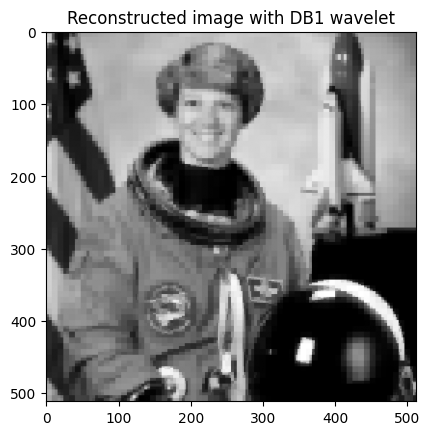

In [8]:
coeffs_db1 = pywt.wavedec2(img, 'db1', level=4)
arr_coeffs_db1, _ = pywt.coeffs_to_array(coeffs_db1)
non_zero_coeffs_db1 = np.count_nonzero(arr_coeffs_db1)
print("Non-zero coefficients before thresholding: ", non_zero_coeffs_db1)

(cH_db1, cV_db1, cD_db1) = coeffs_db1[4]
cH_db1_thresh_fine = pywt.threshold(cH_db1, t_fine, mode='soft')
cV_db1_thresh_fine = pywt.threshold(cV_db1, t_fine, mode='soft')
cD_db1_thresh_fine = pywt.threshold(cD_db1, t_fine, mode='soft')
coeffs_db1[4] = (cH_db1_thresh_fine, cV_db1_thresh_fine, cD_db1_thresh_fine)

(cH_db1, cV_db1, cD_db1) = coeffs_db1[3]
cH_db1_thresh_mid = pywt.threshold(cH_db1, t_mid, mode='soft')
cV_db1_thresh_mid = pywt.threshold(cV_db1, t_mid, mode='soft')
cD_db1_thresh_mid = pywt.threshold(cD_db1, t_mid, mode='soft')
coeffs_db1[3] = (cH_db1_thresh_mid, cV_db1_thresh_mid, cD_db1_thresh_mid)

(cH_db1, cV_db1, cD_db1) = coeffs_db1[2]
cH_db1_thresh_coarse = pywt.threshold(cH_db1, t_coarse, mode='soft')
cV_db1_thresh_coarse = pywt.threshold(cV_db1, t_coarse, mode='soft')
cD_db1_thresh_coarse = pywt.threshold(cD_db1, t_coarse, mode='soft')
coeffs_db1[2] = (cH_db1_thresh_coarse, cV_db1_thresh_coarse, cD_db1_thresh_coarse)

img_reconstructed_db1 = pywt.waverec2(coeffs_db1, 'db1')
plt.imshow(img_reconstructed_db1, cmap='gray')
plt.title("Reconstructed image with DB1 wavelet")
plt.show()

In [9]:
arr_coeffs_db1, _ = pywt.coeffs_to_array(coeffs_db1)
non_zero_coeffs_db1_after = np.count_nonzero(arr_coeffs_db1)
print("Non-zero coefficients after thresholding: ", non_zero_coeffs_db1_after)
compression_ratio_db1 = non_zero_coeffs_db1 / non_zero_coeffs_db1_after
print("Compression ratio (DB1): ", compression_ratio_db1)

Non-zero coefficients after thresholding:  6635
Compression ratio (DB1):  35.60422004521477


Now we're able to compare the three cases.

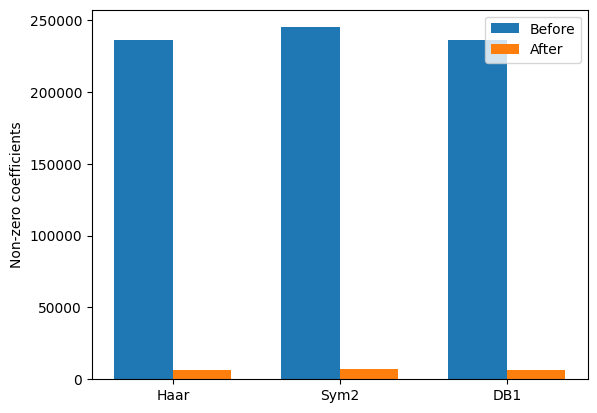

In [10]:
labels = ['Haar', 'Sym2', 'DB1']
before = [non_zero_coeffs_haar, non_zero_coeffs_sym2, non_zero_coeffs_db1]
after = [non_zero_coeffs_haar_after, non_zero_coeffs_sym2_after, non_zero_coeffs_db1_after]

x = np.arange(len(labels))  # positions
width = 0.35

plt.bar(x - width/2, before, width, label='Before')
plt.bar(x + width/2, after, width, label='After')

plt.xticks(x, labels)
plt.ylabel("Non-zero coefficients")
plt.legend()
plt.show()


It's impressive seeing how many non-zero coefficients we have before and after thresholding. What about the compression ratios?

In [11]:
print("Haar compression ratio: ", compression_ratio_haar)
print("Sym2 compression ratio: ", compression_ratio_sym2)
print("DB1 compression ratio: ", compression_ratio_db1)

Haar compression ratio:  35.60422004521477
Sym2 compression ratio:  35.453914050065116
DB1 compression ratio:  35.60422004521477


The compression ratios are really similar. In PyWavelets, <tt>haar</tt> and <tt>db1</tt> are the same thing (the first one is an alias of the second): this explains why they have the same compression ratios.

### Compression with others discrete wavelet types
We do not have only these three kinds of wavelets. What others can we use?

In [12]:
# We use only the discrete wavelets.
wavelet_types = pywt.wavelist(kind='discrete')
# We store the processed images, the coefficients before and after thresholding, and the compression ratios.
images = []
coeffs_before = []
coeffs_after = []
compression_ratios = []
for wavelet in wavelet_types:
    # We continue working with 4 levels.
    coeffs = pywt.wavedec2(img, wavelet, level=4)
    arr_coeffs, _ = pywt.coeffs_to_array(coeffs)
    non_zero_coeffs = np.count_nonzero(arr_coeffs)
    coeffs_before.append(non_zero_coeffs)

    cH, cV, cD = coeffs[4]
    cH_thresh_fine = pywt.threshold(cH, t_fine, mode='soft')
    cV_thresh_fine = pywt.threshold(cV, t_fine, mode='soft')
    cD_thresh_fine = pywt.threshold(cD, t_fine, mode='soft')
    coeffs[4] = (cH_thresh_fine, cV_thresh_fine, cD_thresh_fine)

    cH, cV, cD = coeffs[3]
    cH_thresh_mid = pywt.threshold(cH, t_mid, mode='soft')
    cV_thresh_mid = pywt.threshold(cV, t_mid, mode='soft')
    cD_thresh_mid = pywt.threshold(cD, t_mid, mode='soft')
    coeffs[3] = (cH_thresh_mid, cV_thresh_mid, cD_thresh_mid)
    
    cH, cV, cD = coeffs[2]
    cH_thresh_coarse = pywt.threshold(cH, t_coarse, mode='soft')
    cV_thresh_coarse = pywt.threshold(cV, t_coarse, mode='soft')
    cD_thresh_coarse = pywt.threshold(cD, t_coarse, mode='soft')
    coeffs[2] = (cH_thresh_coarse, cV_thresh_coarse, cD_thresh_coarse)

    img_reconstructed = pywt.waverec2(coeffs, wavelet)
    images.append(img_reconstructed)

    arr_coeffs, _ = pywt.coeffs_to_array(coeffs)
    non_zero_coeffs_after = np.count_nonzero(arr_coeffs)
    coeffs_after.append(non_zero_coeffs_after)
    compression_ratio = non_zero_coeffs / non_zero_coeffs_after
    compression_ratios.append(compression_ratio)

c:\Users\Sara\AppData\Local\Programs\Python\Python313\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


The discrete wavelets are divided in different families:
- <tt>haar</tt> -> Haar
- <tt>db</tt> -> Daubechies
- <tt>sym</tt> -> Symelts
- <tt>coif</tt> -> Coiflets
- <tt>bior</tt> -> Biorthogonal
- <tt>dmey</tt> -> "Discrete" FIR approximation of Meyer wavelet

We can see the compression ratio for each wavelet.

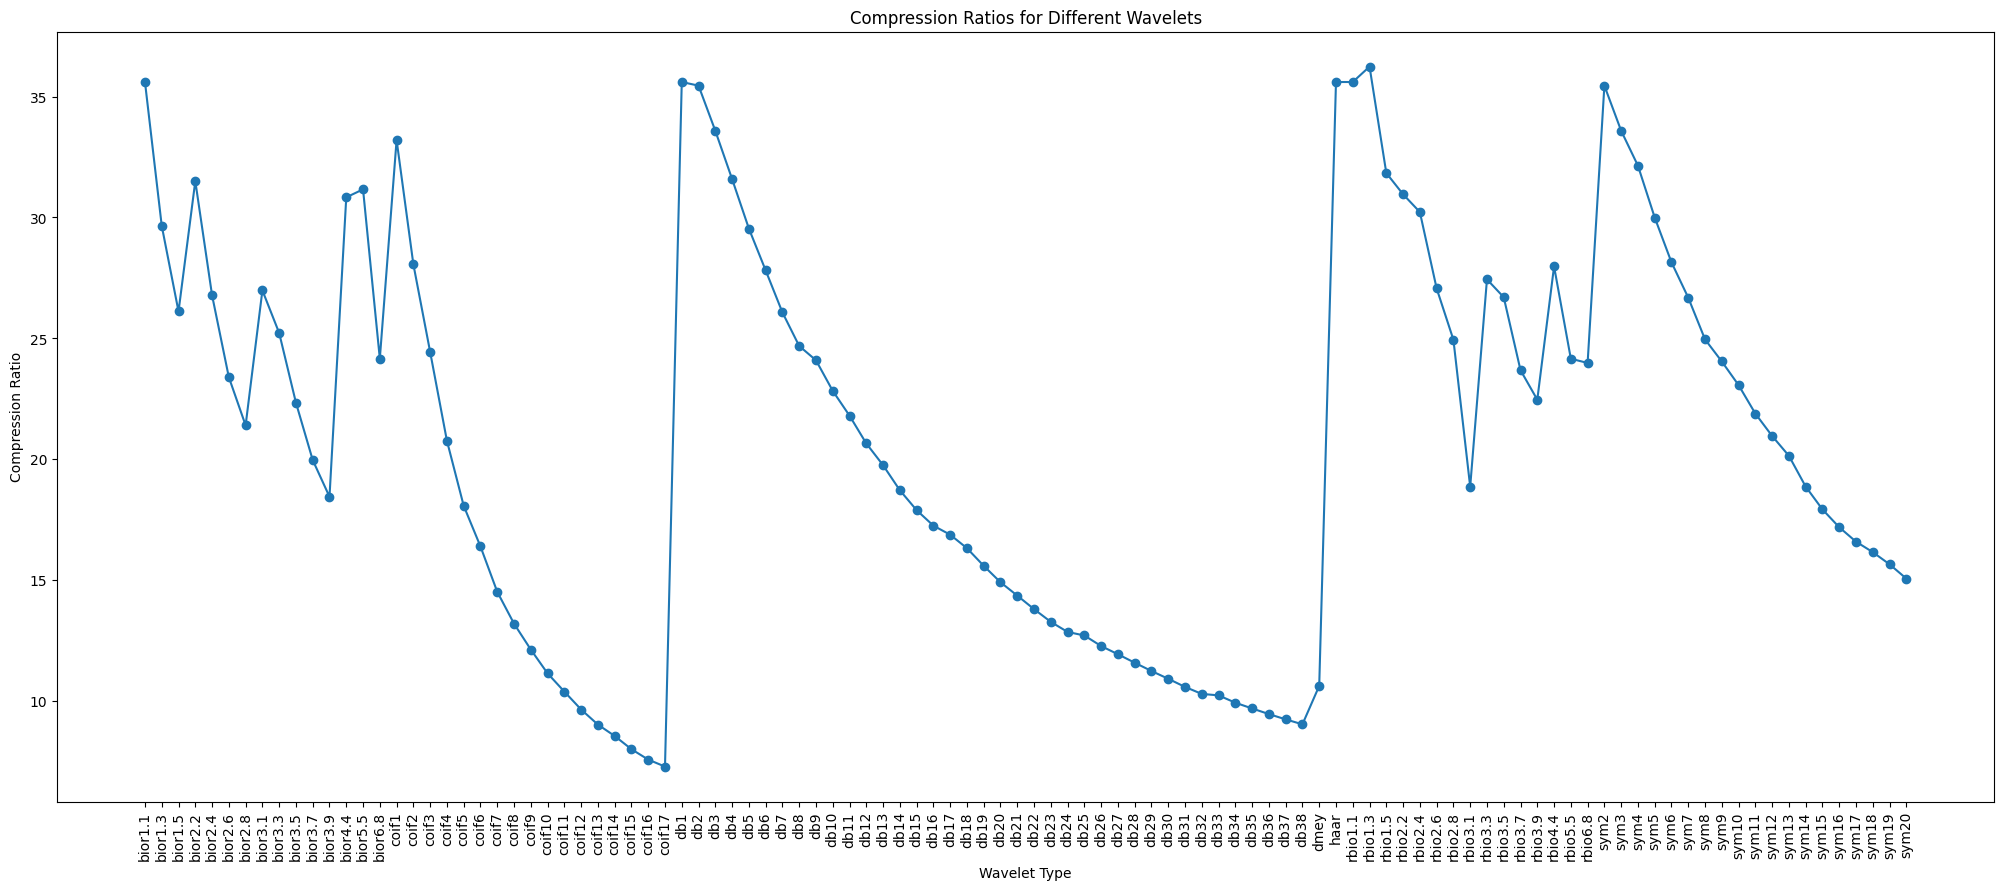

In [13]:
labels = wavelet_types
plt.figure(figsize=(25, 10))
plt.plot(labels, compression_ratios, marker='o')
plt.xlabel("Wavelet Type")
plt.xticks(rotation=90)
plt.ylabel("Compression Ratio")
plt.title("Compression Ratios for Different Wavelets")
plt.show()

For each family, we have a certain number of wavelets. In fact, we can clearly see that they are numbered. We have this distinction because, in the implementation, there is a change in the length of the filters: the number does correlate with length of the filters only because they are both increasing, but there is no other link. We can see in the plot above that for <tt>coif</tt>, <tt>db</tt> and <tt>sym</tt> families, the increasing of the filters length means that the compression ratio decreases. <br> Wavelets with shorter filters tend to create sparser coefficients, having higher compression ratio; they however lose in quality. Wavelets with long filters, on the other hand, have a smoother reconstruction but less sparsity at the same threshold.

### Quality of the reconstruction: PSNR
Peak signal-to-noise ratio (PSNR) is commonly used to quantify the reconstruction quality after a compression. It's based after the most basic quantifier of reconstruction quality: the Mean Squared Error (MSE).

$$PSNR=20\log_{10}\bigg( \frac{MAX_f}{\sqrt{MSE}} \bigg)$$
where
$$MSE=\frac{1}{mn}\displaystyle\sum_0^{m-1}\displaystyle\sum_0^{n-1}||f(i,j)-g(i,j)||^2.$$

- $f$ represents the matrix data of our original image.
- $g$ represent the matrix data of our compressed image.
- $m$ represents the numbers of rows of pixels of the images and $i$ represents the index of that row.
- $m$ represents the numbers of columns of pixels of the images and $j$ represents the index of that column.
- $MAX_f$ is the maximum signal value that exists in our original image.

We want to compute the PSNR for all the type of wavelets.

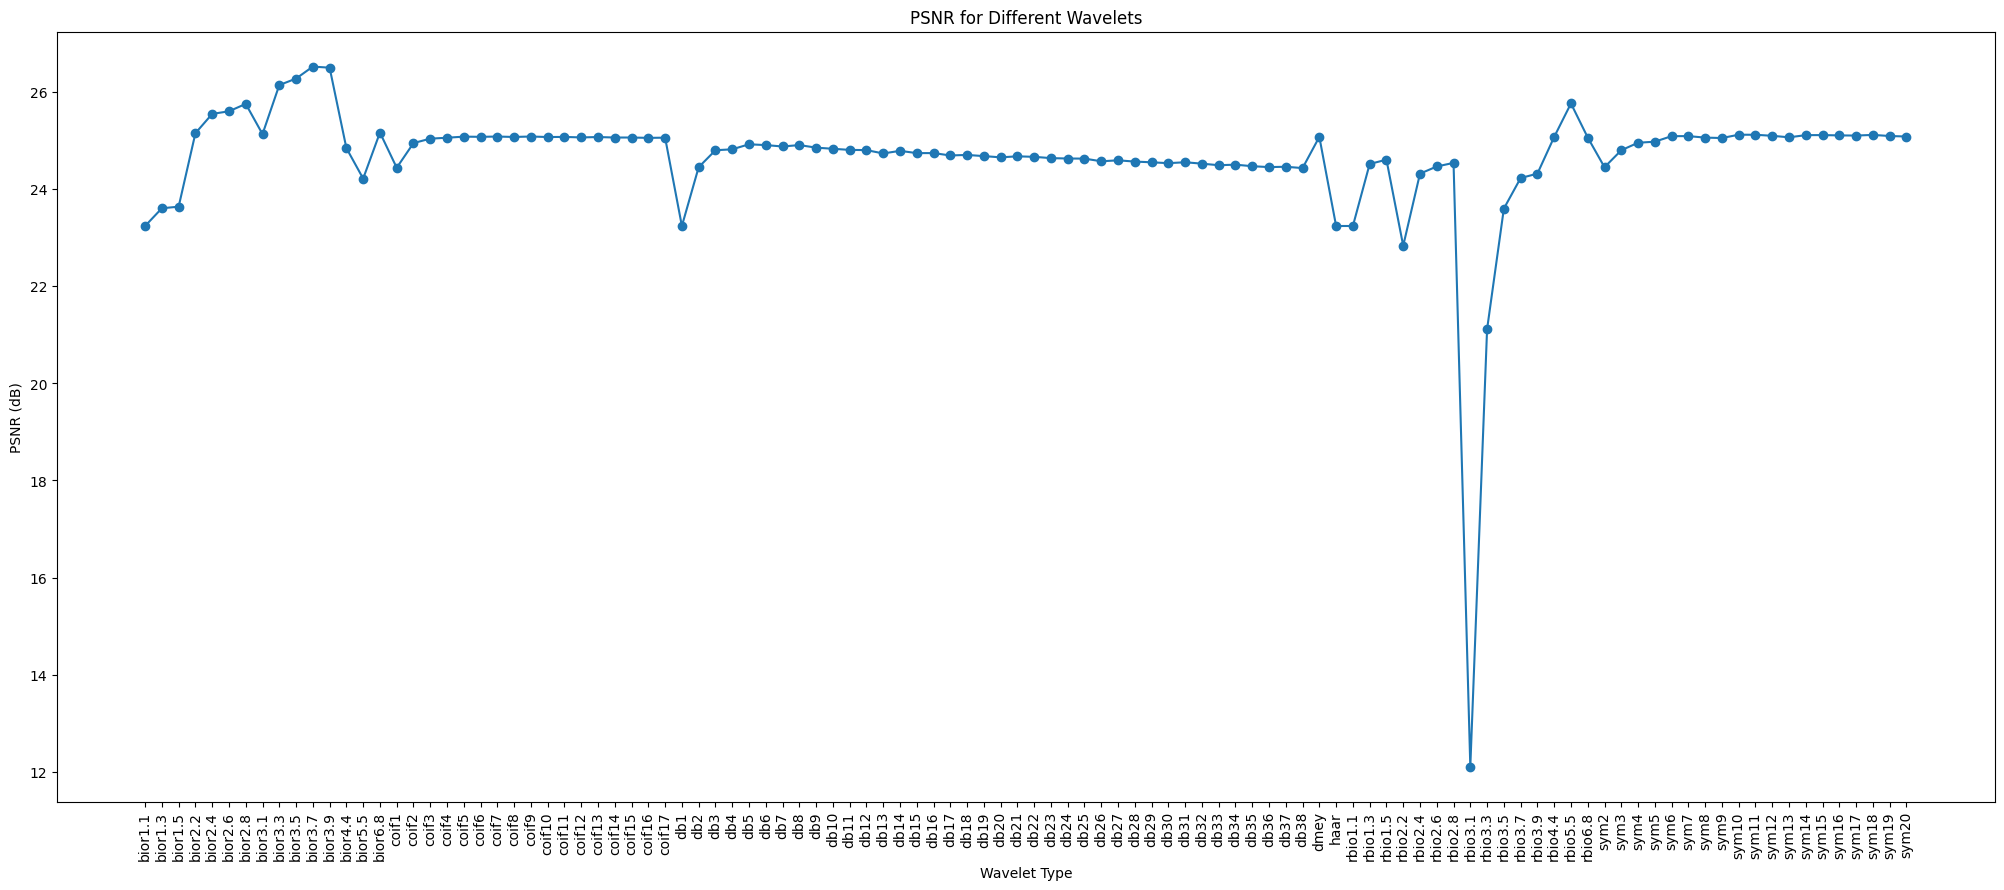

In [14]:
from skimage.metrics import peak_signal_noise_ratio

# List to store PSNR values
psnr_values = []
for i in labels:
    psnr = peak_signal_noise_ratio(img, images[labels.index(i)])
    psnr_values.append(psnr)

plt.figure(figsize=(25, 10))
plt.plot(labels, psnr_values, marker='o')
plt.xlabel("Wavelet Type")
plt.ylabel("PSNR (dB)")
plt.title("PSNR for Different Wavelets")
plt.xticks(rotation=90)
plt.show()

We can look at the best and worst image reconstruction given by the PSNR.

In [15]:
best_wavelet_index = np.argmax(psnr_values)
best_wavelet = wavelet_types[best_wavelet_index]
print("Best wavelet:", best_wavelet)
worst_wavelet_index = np.argmin(psnr_values)
worst_wavelet = wavelet_types[worst_wavelet_index]
print("Worst wavelet:", worst_wavelet)

Best wavelet: bior3.7
Worst wavelet: rbio3.1


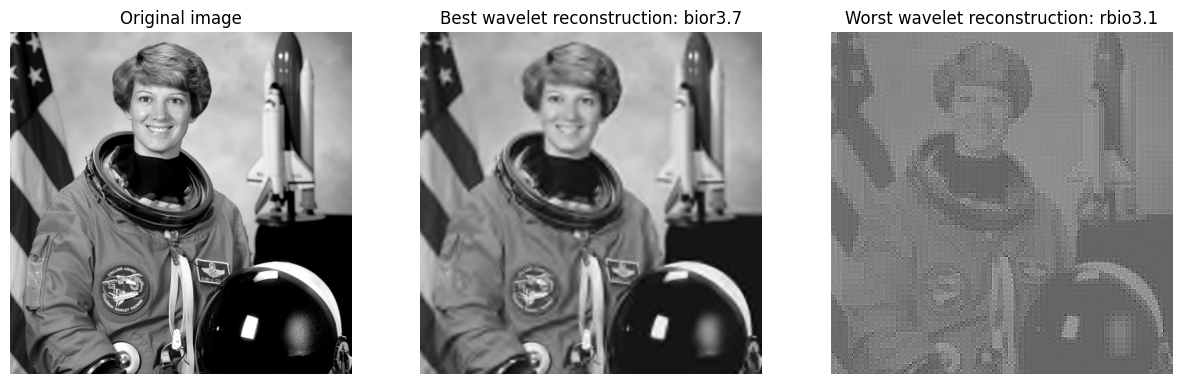

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title("Original image")
plt.axis('off')

plt.subplot(132)
plt.imshow(images[best_wavelet_index], cmap='gray')
plt.title(f"Best wavelet reconstruction: {best_wavelet}")
plt.axis('off')

plt.subplot(133)
plt.imshow(images[worst_wavelet_index], cmap='gray')
plt.title(f"Worst wavelet reconstruction: {worst_wavelet}")
plt.axis('off')

plt.show()

## Image denoising
Wavelets can be also used for denoising, as we have seen during the course on 1D signals. <br>How can we use them on images?

We start by taking an image and noising it.

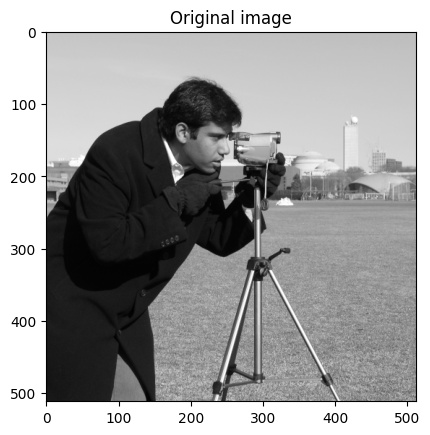

In [17]:
img = skimage.data.camera()
plt.imshow(img, cmap="gray")
plt.title("Original image")
plt.show()

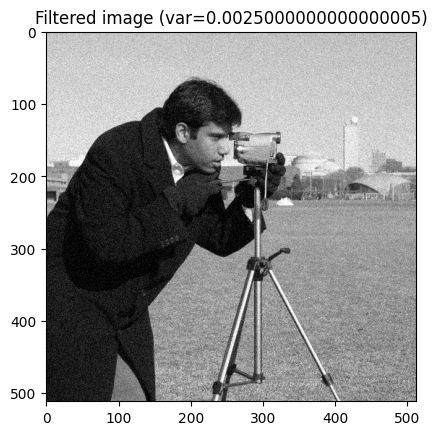

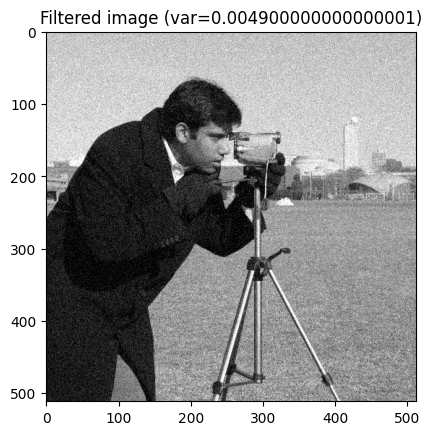

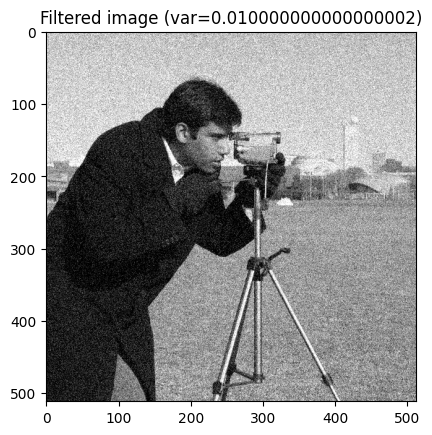

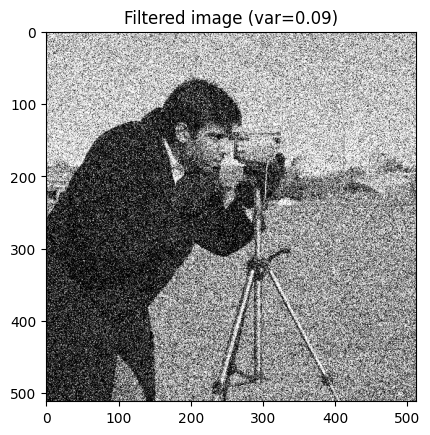

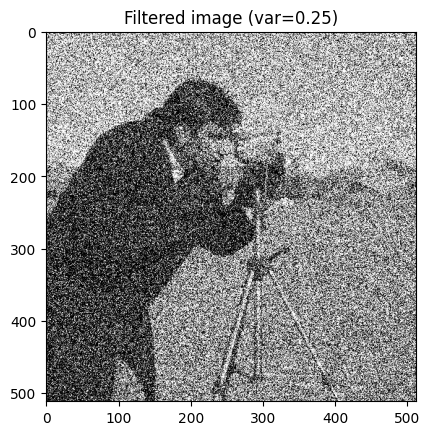

In [18]:
sigma = [0.05, 0.07, 0.1, 0.3, 0.5]
var = [s**2 for s in sigma]
noisy = []
for v in var:
    img_filt = skimage.util.random_noise(img, mode='gaussian', var=v)
    noisy.append(img_filt)
    plt.imshow(img_filt, cmap="gray")
    plt.title(f"Filtered image (var={v})")
    plt.show()

The image is now noisy: we created multiple filtered images in order to study better the behaviour of the denoising as the value of the standard deviation changes. 

### BayesShrink and VisuShrink
We have two modes for wavelet denoising: BayesShrink and VisuShrink.
- BayesShrink: adaptive approach, where a unique threshold is estimated for each wavelet subband (improvement over what can be obtained using a single threshold)
- VisuShrink: single and universal threshold applied to all the wavelet detail coefficients; using a sigma smaller than the true standard deviation, we have a more visually agreeable result

Estimated noise standard deviation (sigma=0.05, estimated sigma: 0.05275494318115322)


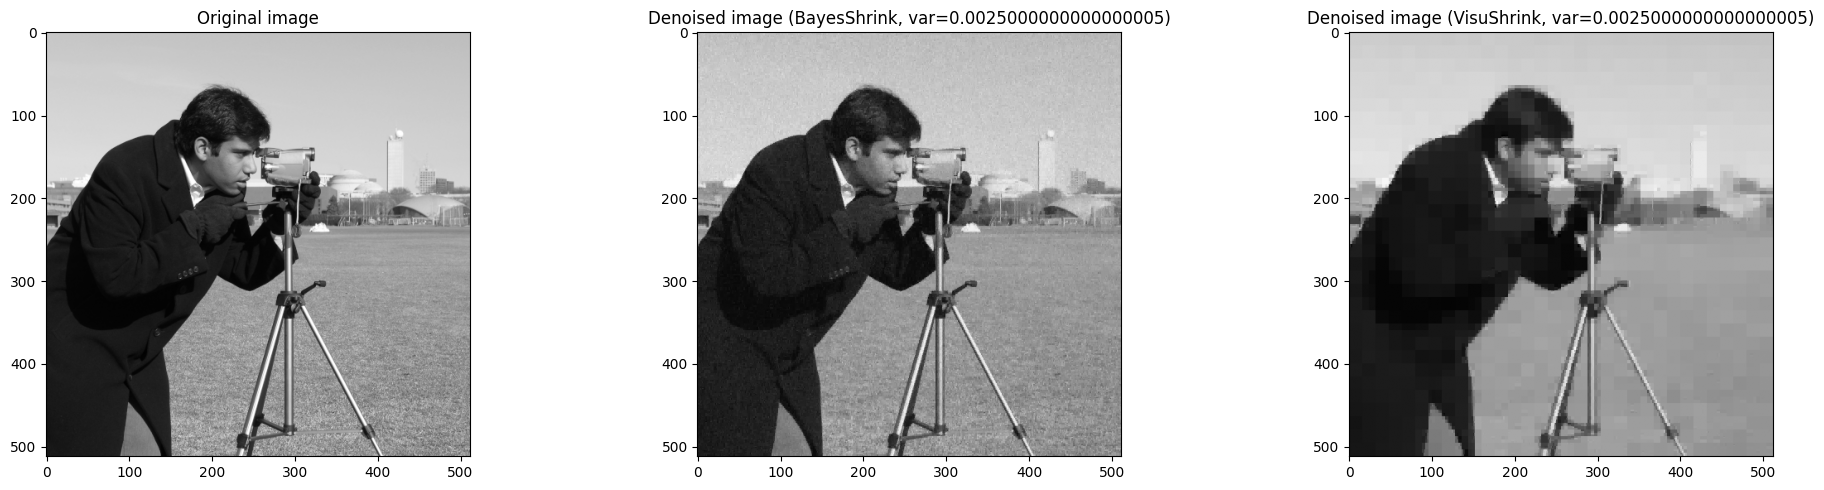

Estimated noise standard deviation (sigma=0.07, estimated sigma: 0.07141633644259607)


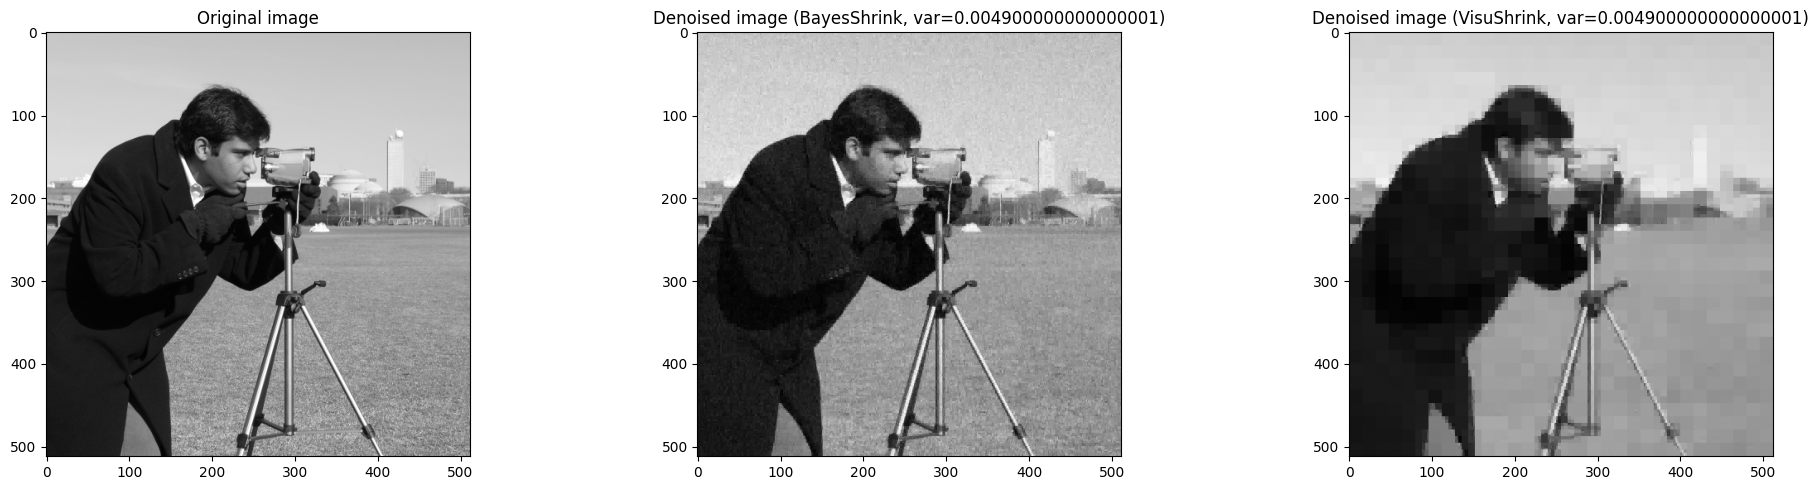

Estimated noise standard deviation (sigma=0.1, estimated sigma: 0.09711078066167142)


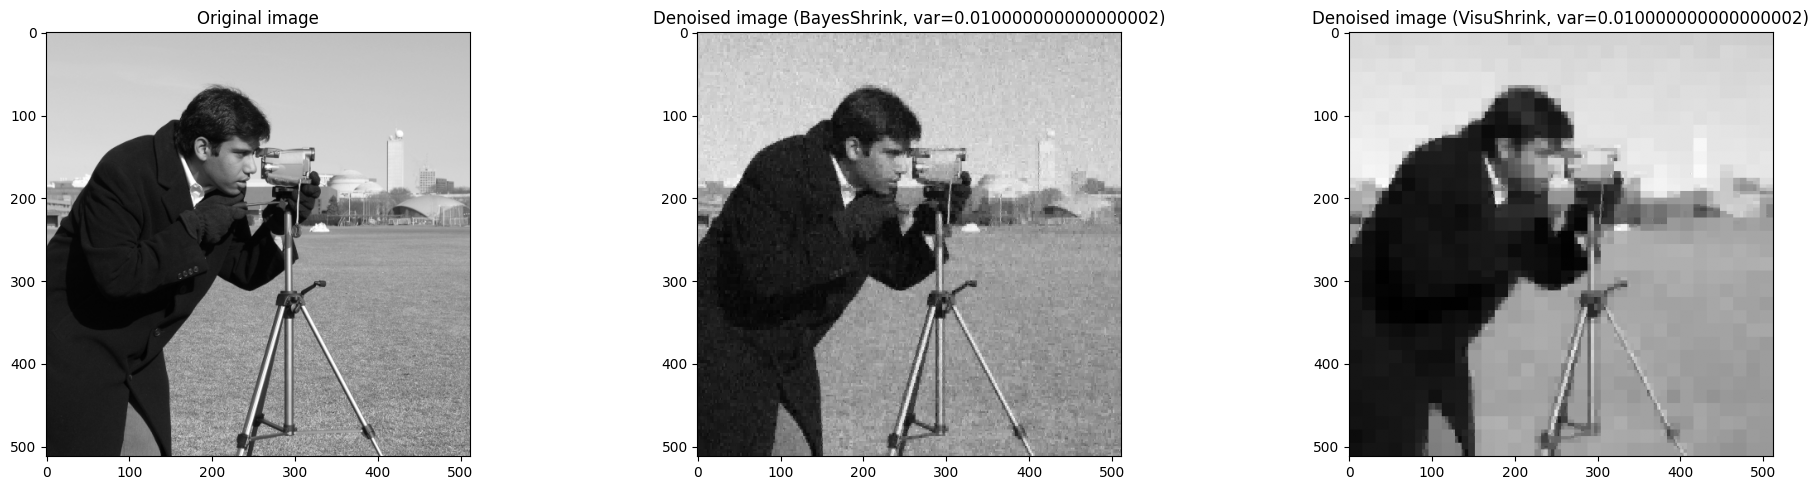

Estimated noise standard deviation (sigma=0.3, estimated sigma: 0.23651366501614848)


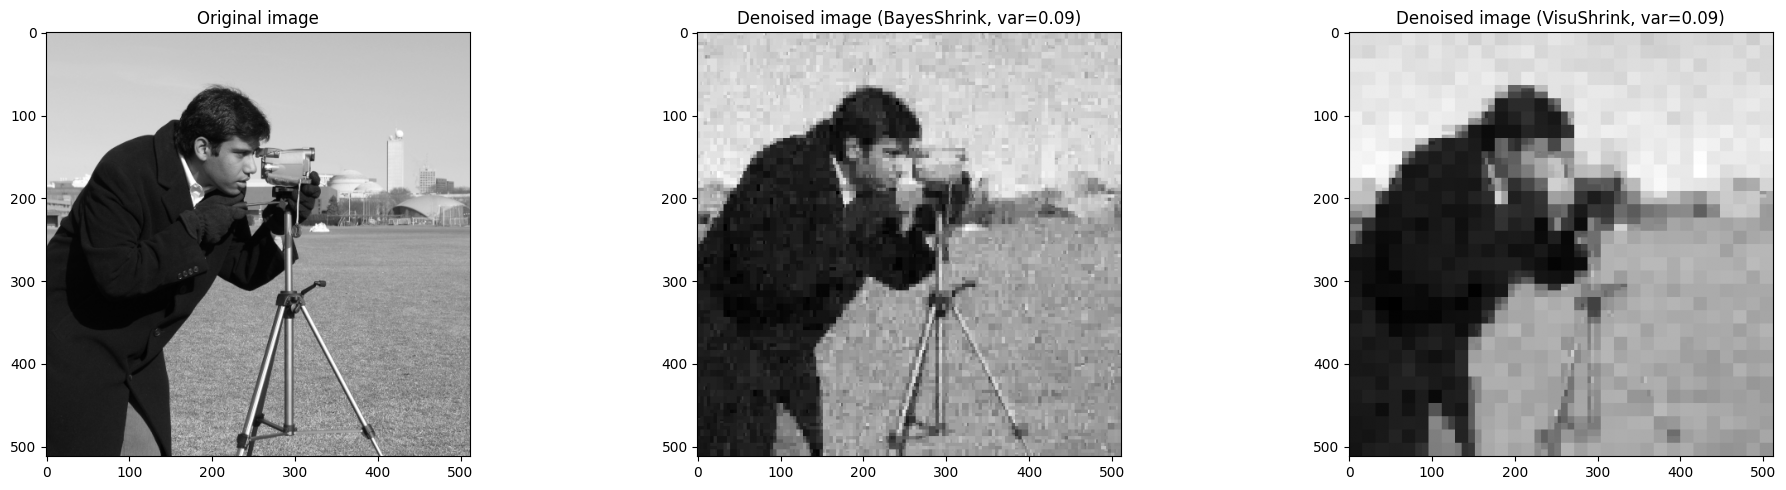

Estimated noise standard deviation (sigma=0.5, estimated sigma: 0.3326725925493613)


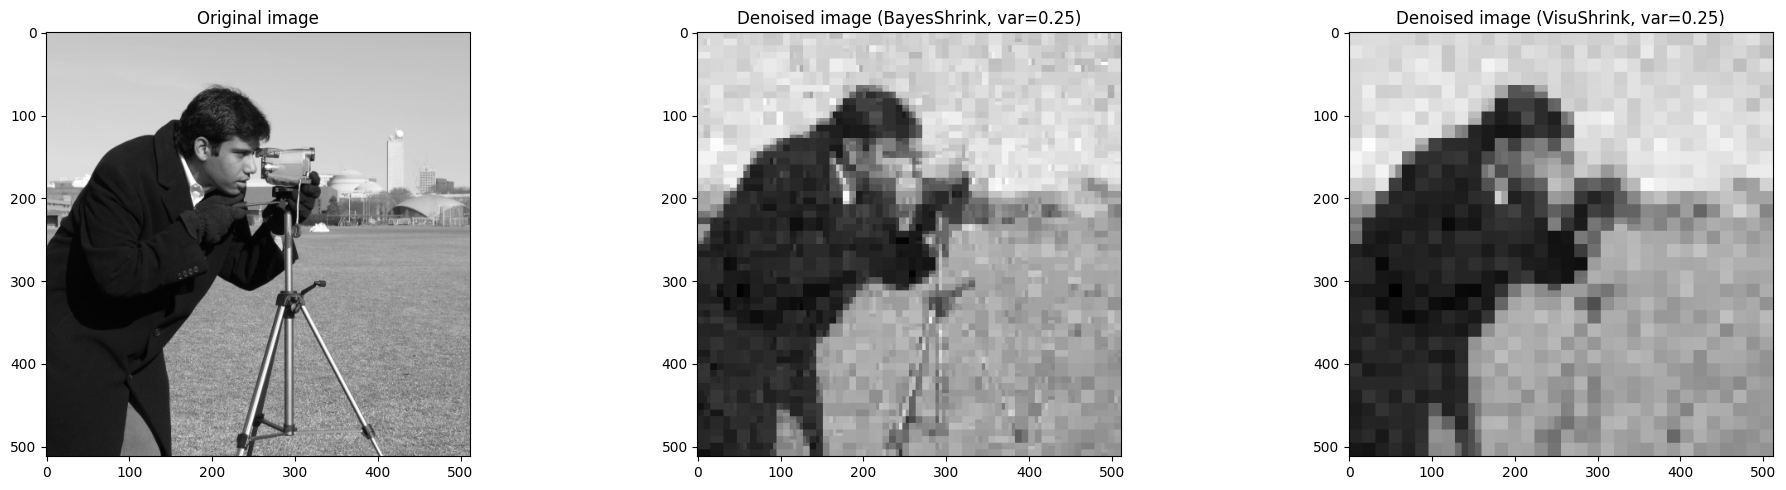

In [19]:
from skimage.restoration import denoise_wavelet, estimate_sigma

# We store the images
bayes = []
visu = []

for i in range(len(noisy)):
    # We first estimate the sigma used in the noising process.
    est_sigma = estimate_sigma(noisy[i], average_sigmas=True)
    denoised_img_bayes = denoise_wavelet(noisy[i], mode='soft', wavelet_levels=4, method='BayesShrink', sigma=est_sigma)
    bayes.append(denoised_img_bayes)
    denoised_img_visu = denoise_wavelet(noisy[i], mode='soft', wavelet_levels=4, method='VisuShrink', sigma=est_sigma)
    visu.append(denoised_img_visu)
    print(f"Estimated noise standard deviation (sigma={sigma[i]}, estimated sigma: {est_sigma})")
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original image")
    plt.subplot(1, 3, 2)
    plt.imshow(denoised_img_bayes, cmap="gray")
    plt.title(f"Denoised image (BayesShrink, var={var[i]})")
    plt.subplot(1, 3, 3)
    plt.imshow(denoised_img_visu, cmap="gray")
    plt.title(f"Denoised image (VisuShrink, var={var[i]})")
    plt.tight_layout()
    plt.show()

In order to quantify the quality of the denoising, we compute the PSNR.

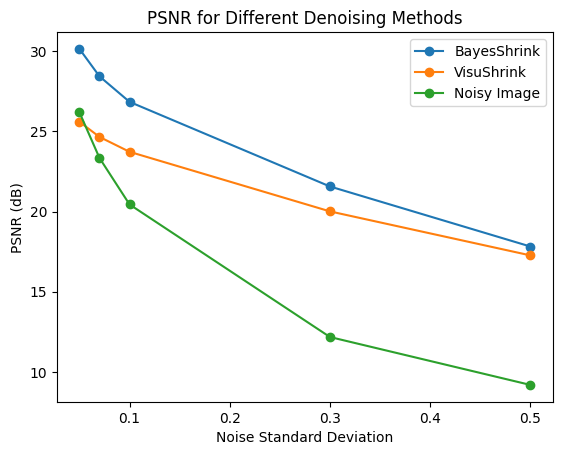

In [20]:
psnr_bayes = []
psnr_visu = []
psnr_noisy = []

# We have to normalize the image
img = img/255.0

for i in range(len(noisy)):
    psnr_bayes.append(peak_signal_noise_ratio(img, bayes[i], data_range=1.0))
    psnr_visu.append(peak_signal_noise_ratio(img, visu[i], data_range=1.0))
    psnr_noisy.append(peak_signal_noise_ratio(img, noisy[i], data_range=1.0))

plt.plot(sigma, psnr_bayes, marker='o', label='BayesShrink')
plt.plot(sigma, psnr_visu, marker='o', label='VisuShrink')
plt.plot(sigma, psnr_noisy, marker='o', label='Noisy Image')
plt.xlabel("Noise Standard Deviation")
plt.ylabel("PSNR (dB)")
plt.title("PSNR for Different Denoising Methods")
plt.legend()
plt.show()

The best result is obtained by the BayesShrink method: it outperforms VisuShrink for each image. On the other hand, VisuShrink for the lowest value of $\sigma$ is worse than the correspondent noisy image: this behaviour is then forgotten because we have a big difference between the markers for higher values of the standard deviation.

### A step further with VisuShrink
As written before, VisuShrink can obtain better results specifing smaller values for the standard deviation.

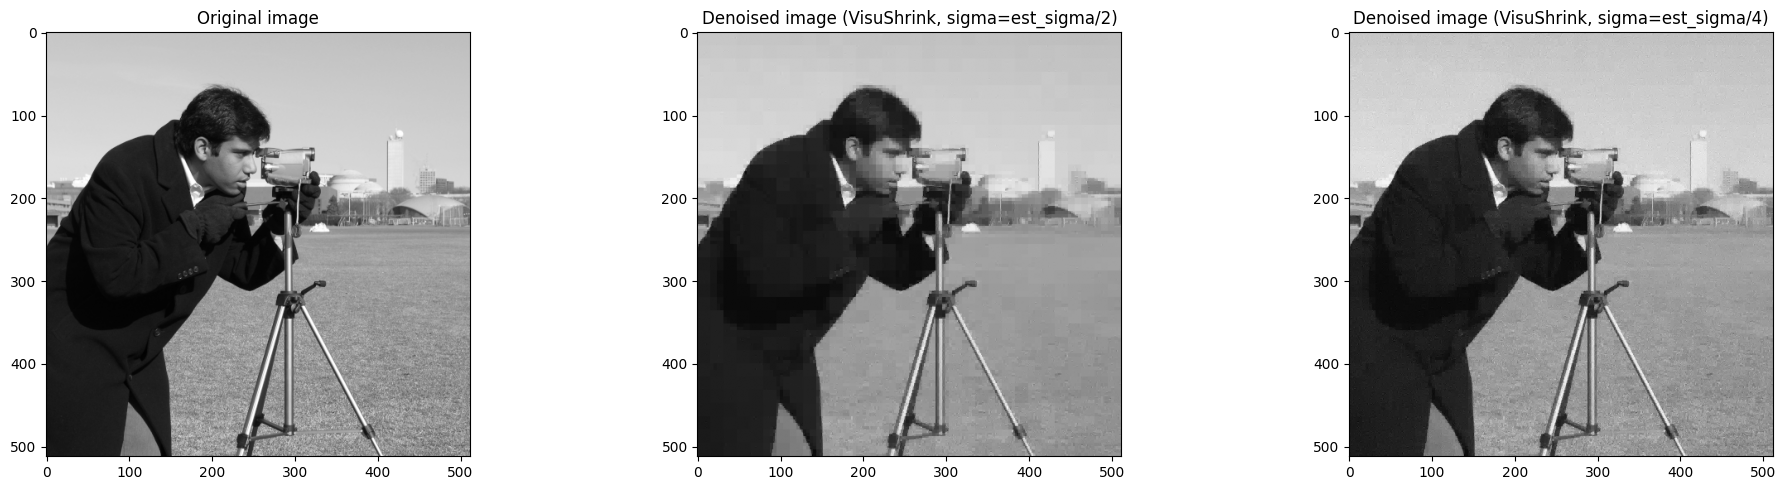

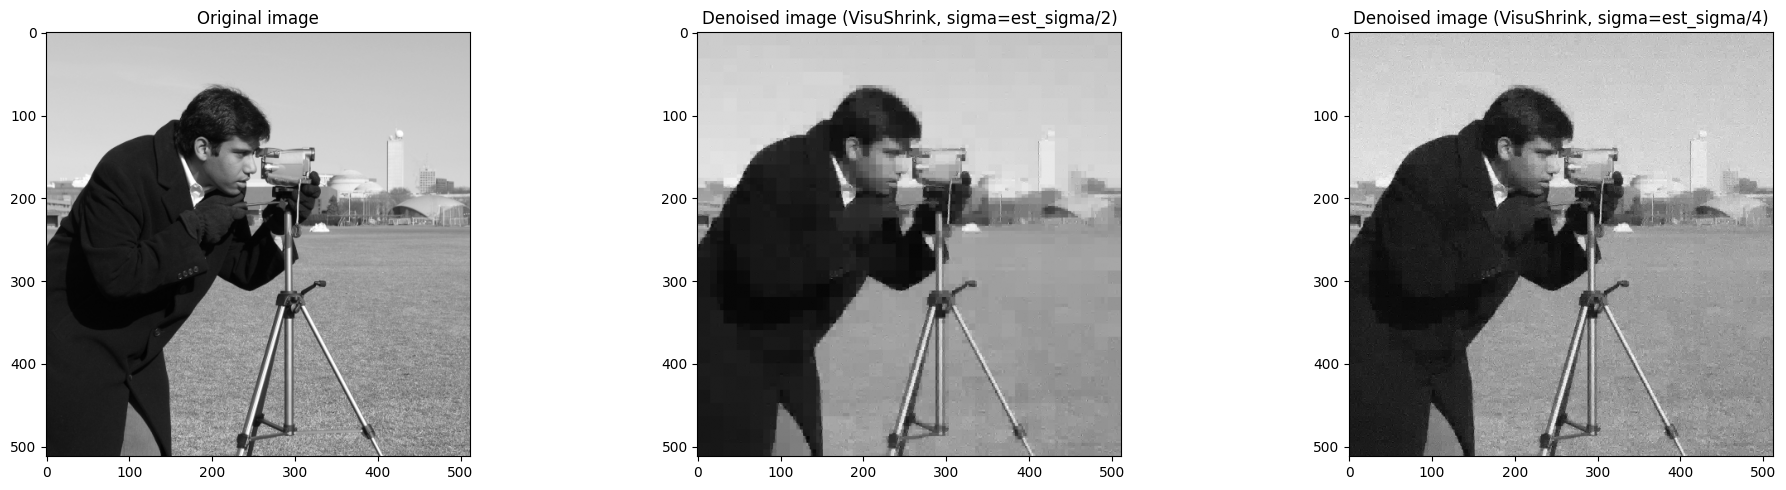

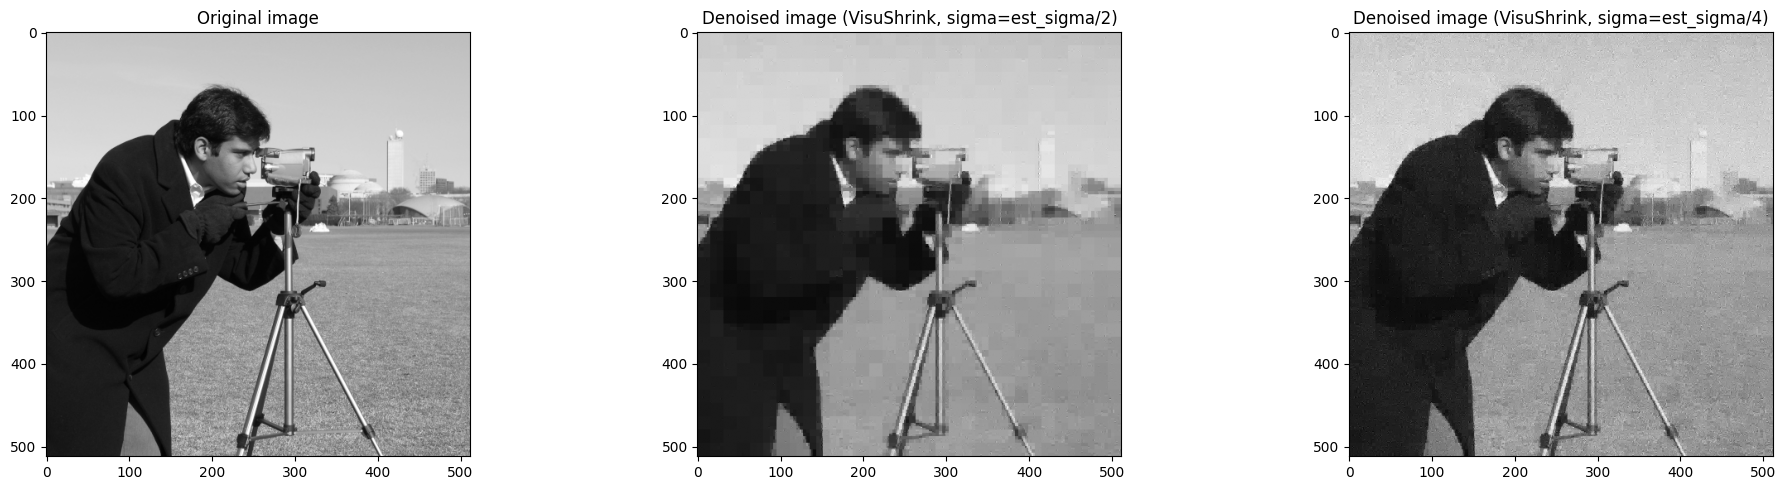

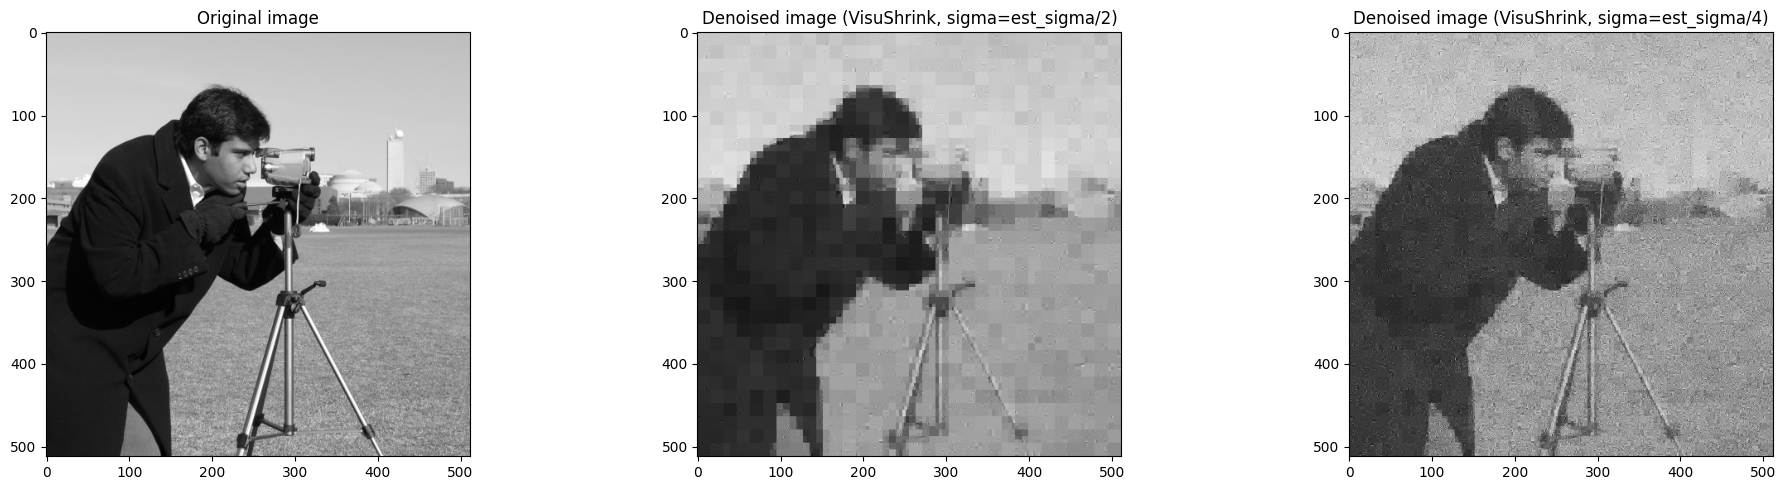

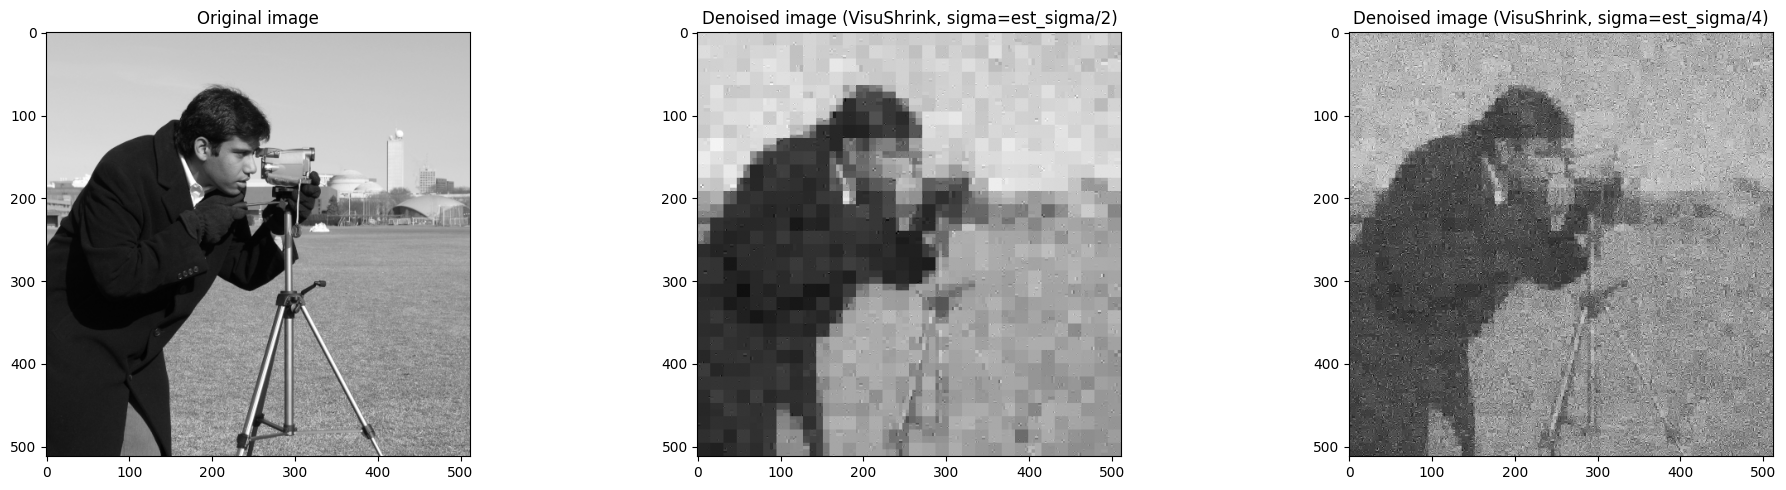

In [21]:
# We store the new images.
visu_2 = []
visu_4 = []

for i in range(len(noisy)):
    est_sigma = estimate_sigma(noisy[i], average_sigmas=True)
    denoised_img_visu_2 = denoise_wavelet(noisy[i], mode='soft', wavelet_levels=4, method='VisuShrink', sigma=est_sigma/2)
    visu_2.append(denoised_img_visu_2)
    denoised_img_visu_4 = denoise_wavelet(noisy[i], mode='soft', wavelet_levels=4, method='VisuShrink', sigma=est_sigma/4)
    visu_4.append(denoised_img_visu_4)
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original image")
    plt.subplot(1, 3, 2)
    plt.imshow(denoised_img_visu_2, cmap="gray")
    plt.title(f"Denoised image (VisuShrink, sigma=est_sigma/2)")
    plt.subplot(1, 3, 3)
    plt.imshow(denoised_img_visu_4, cmap="gray")
    plt.title(f"Denoised image (VisuShrink, sigma=est_sigma/4)")
    plt.tight_layout()
    plt.show()

The result are apparently better: we can now compute and visualize the PSNR.

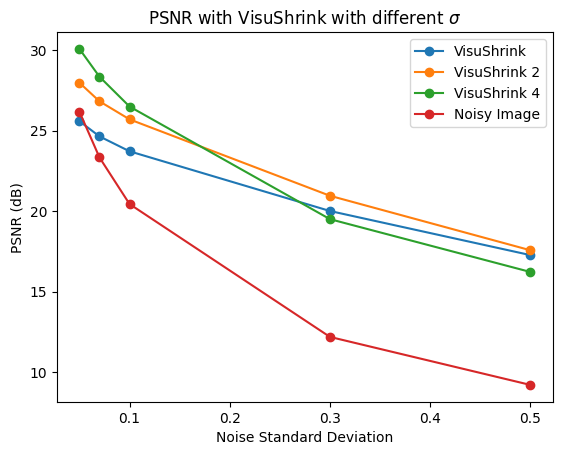

In [22]:
psnr_visu2 = []
psnr_visu4 = []

for i in range(len(noisy)):
    psnr_visu2.append(peak_signal_noise_ratio(img, visu_2[i], data_range=1.0))
    psnr_visu4.append(peak_signal_noise_ratio(img, visu_4[i], data_range=1.0))

plt.plot(sigma, psnr_visu, marker='o', label='VisuShrink')
plt.plot(sigma, psnr_visu2, marker='o', label='VisuShrink 2')
plt.plot(sigma, psnr_visu4, marker='o', label='VisuShrink 4')
plt.plot(sigma, psnr_noisy, marker='o', label='Noisy Image')
plt.xlabel("Noise Standard Deviation")
plt.ylabel("PSNR (dB)")
plt.title("PSNR with VisuShrink with different $\\sigma$")
plt.legend()
plt.show()

For highest values of the standard deviation we obtain the best result with the VisuShrink variant that uses as $\sigma$ the estimated value divided by 2. What started as the best result ($\sigma=\sigma_{est}/2$) becomes the worst reconstruction at the end of our analysis.

## References
Here are some of the links I visited to understand better some metrics and terminologies used.
- [Peak Signal-to-Noise Ratio as an Image Quality Metric](https://www.ni.com/en/shop/data-acquisition-and-control/add-ons-for-data-acquisition-and-control/what-is-vision-development-module/peak-signal-to-noise-ratio-as-an-image-quality-metric.html)
- [Peak signal-to-noise ratio: Wikipedia](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)
- [scikit-image: Wavelet denoising](https://scikit-image.org/docs/0.25.x/auto_examples/filters/plot_denoise_wavelet.html)